Importing The necessary Libraries

In [21]:
import numpy as np
import pandas as pd
import scipy as sl
import matplotlib.pyplot as mat
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Loading The Train and Test Data Seperately

In [22]:
train_df=pd.read_csv("train.csv")

Printing The Train and Test Dataset

In [23]:
print("\n\nThe Shapes Of the Datase : ",train_df.shape)



The Shapes Of the Datase :  (30000, 24)


In [24]:
print("\n\nThe Type of The Attribues in the Dataset\n\n",train_df.dtypes)



The Type of The Attribues in the Dataset

 Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object


In [25]:
#print("\n\nThe Type of The Attribues in the Dataset\n\n",test_df.dtypes)

Finding The Missing Values in Each Attributes in the Training Dataset

In [26]:
print("\n\nThe Number of Missing Values in Each Attributes in Training Dataset\n\n",train_df.isnull().sum())



The Number of Missing Values in Each Attributes in Training Dataset

 Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


Finding The Missing Values in Each Attributes in the Test Dataset

Handling The Missing Values in Traing and Test dataset

The Gender is the categorical features. So handling the error fill the Most occured gender in that Missing values

In [27]:
most_frequent_train_gender = train_df['Gender'].mode()[0]
train_df['Gender'] = train_df['Gender'].fillna(most_frequent_train_gender)

print("The Most Occurred Gender in Traing Data : ",most_frequent_train_gender)


The Most Occurred Gender in Traing Data :  M


The Income (USD) attribute has the numerical values. So handling the error fill the median of Income attribute in that Missing values

In [28]:
train_median=train_df['Income (USD)'].median()

print("The Median of Income (USD) in Traing Data : ",train_median)

train_df['Income (USD)']=train_df['Income (USD)'].fillna(train_median)


The Median of Income (USD) in Traing Data :  2222.435


The Current Loan Expenses (USD) attribute has the numerical values. So handling the error fill the median of Income attribute in that Missing values

In [29]:
train_median=train_df['Current Loan Expenses (USD)'].median()

print("The Median of Income (USD) in Traing Data : ",train_median)

train_df['Current Loan Expenses (USD)']=train_df['Current Loan Expenses (USD)'].fillna(train_median)

The Median of Income (USD) in Traing Data :  375.205


The Dependents is the categorical features. So handling the error fill the Most occured in that Missing values

In [30]:
train_Dependents = train_df['Dependents'].mode()[0]

print("The Most Occurred Gender in Traing Data : ",train_Dependents)

The Most Occurred Gender in Traing Data :  2.0


The Credit Score attribute has the numerical values. So handling the error fill the median of Income attribute in that Missing values

In [31]:
train_median=train_df['Credit Score'].median()

print("The Median of Income (USD) in Traing Data : ",train_median)

train_df['Credit Score']=train_df['Credit Score'].fillna(train_median)

The Median of Income (USD) in Traing Data :  739.82


In [32]:
print("\n\nThe Number of Missing Values in Each Attributes in Training Dataset\n\n",train_df.isnull().sum())



The Number of Missing Values in Each Attributes in Training Dataset

 Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


The Has Active Credit Card is the categorical features. So handling the error fill the Most occured in that Missing values

In [33]:

features_for_imputation = ['Dependents','Income (USD)', 'Loan Amount Request (USD)','Current Loan Expenses (USD)']

target_feature = 'Has Active Credit Card'
features_for_modeling = ['Dependents','Income (USD)', 'Loan Amount Request (USD)','Current Loan Expenses (USD)']

data_with_missing = train_df[train_df[target_feature].isnull()]
data_without_missing = train_df.dropna(subset=['Has Active Credit Card'])

print("Shape of data_with_missing:", data_with_missing.shape)

classifier = RandomForestClassifier()
classifier.fit(data_without_missing[features_for_modeling], data_without_missing[target_feature])

predicted_values = classifier.predict(data_with_missing[features_for_modeling])
print(predicted_values)
probabilistic_imputation = np.random.choice(predicted_values, size=len(data_with_missing))
print(probabilistic_imputation)

train_df.loc[train_df[target_feature].isnull(), target_feature] = probabilistic_imputation

Shape of data_with_missing: (1566, 24)


['Unpossessed' 'Unpossessed' 'Active' ... 'Active' 'Active' 'Active']
['Active' 'Inactive' 'Inactive' ... 'Inactive' 'Unpossessed' 'Inactive']


In [34]:
train_Dependents = train_df['Dependents'].mode()[0]
train_df['Dependents'] = train_df['Dependents'].fillna(train_Dependents)

print("The Most Occurred Gender in Traing Data : ",train_Dependents)

The Most Occurred Gender in Traing Data :  2.0


In [35]:

train_median = train_df['Loan Sanction Amount (USD)'].median()

print("The Median of Loan Sanction Amount (USD) in Training Data: ", train_median)

train_df['Loan Sanction Amount (USD)'] = train_df['Loan Sanction Amount (USD)'].fillna(train_median)

print("Minimum Loan Sanction Amount (USD):", train_df['Loan Sanction Amount (USD)'].min())
print("Maximum Loan Sanction Amount (USD):", train_df['Loan Sanction Amount (USD)'].max())

print(train_df.shape)

train_df = train_df[(train_df['Loan Sanction Amount (USD)'] > 0) & (train_df['Loan Sanction Amount (USD)'] < 200000)]

print(train_df.shape)


The Median of Loan Sanction Amount (USD) in Training Data:  35209.395000000004
Minimum Loan Sanction Amount (USD): -999.0
Maximum Loan Sanction Amount (USD): 481907.32
(30000, 24)
(21505, 24)


The Property Age and Loan Sanction Amount (USD) attribute has the numerical values. So handling the error fill the median of Income attribute in that Missing values

The Income Stability is the categorical features. So handling the error fill the Most occured in that Missing values

In [36]:
columns_to_normalize = ['Loan Amount Request (USD)', 'Income (USD)', 'Property Price']

scaler = MinMaxScaler()

X_sample_normalized = train_df.copy()
X_sample_normalized[columns_to_normalize] = scaler.fit_transform(X_sample_normalized[columns_to_normalize])
train_df=X_sample_normalized


In [37]:
train_df = train_df.drop(columns=['Name', 'Customer ID','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Property ID','Property Age','Property Type','Property Location',])

Selecting The Featurs from Existing featurs

In [38]:
train_df['Has Active Credit Card']=train_df['Has Active Credit Card'].replace({'Unpossessed':0,'Active':1,'Inactive':2})
train_df['Gender']=train_df['Gender'].replace({'M':0,'F':1})

print(train_df.columns)
x_sample = train_df.drop(columns=['Loan Sanction Amount (USD)'])
y_sample = train_df['Loan Sanction Amount (USD)']

print(train_df.isnull().sum())


Index(['Gender', 'Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')
Gender                         0
Age                            0
Income (USD)                   0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64


C:\Users\SSN\AppData\Local\Temp\ipykernel_16000\227734137.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Has Active Credit Card']=train_df['Has Active Credit Card'].replace({'Unpossessed':0,'Active':1,'Inactive':2})
C:\Users\SSN\AppData\Local\Temp\ipykernel_16000\227734137.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Gender']=train_df['Gender'].replace({'M':0,'F':1})


Linear Regression Model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.30, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error  : ", mse)
print("R-squared Score     : ", r2)
print("Mean Absolute Error : ", mae)
print("the Accurracy       : ", (r2*100))


Mean Squared Error  :  75032135.84418862
R-squared Score     :  0.954810477583435
Mean Absolute Error :  3921.7303111004476
the Accurracy       :  95.4810477583435


Represent the results using graphs

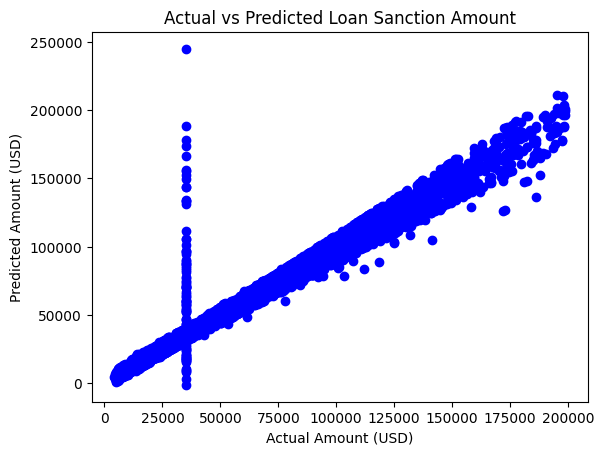

In [40]:
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Loan Sanction Amount')
plt.xlabel('Actual Amount (USD)')
plt.ylabel('Predicted Amount (USD)')
plt.show()
